<a href="https://colab.research.google.com/github/cosmoKnight333/Assignment-1-MnC19/blob/master/cfar10_convo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train = y_train.reshape(-1,)

In [7]:
y_test =y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (5,1.5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

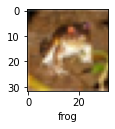

In [10]:
plot_sample(X_train,y_train,0)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8133 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6226 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5423 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4828 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4331 - accuracy: 0.4970


In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 17s 6ms/step - loss: 1.4478 - accuracy: 0.4816
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0876 - accuracy: 0.6190
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9559 - accuracy: 0.6679
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8730 - accuracy: 0.6952
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7980 - accuracy: 0.7230


In [16]:
 cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8922 - accuracy: 0.6971


[0.8921843767166138, 0.6970999836921692]

In [17]:
 cnn.evaluate(X_train,y_train)

1563/1563 [==============================] - 7s 4ms/step - loss: 0.6911 - accuracy: 0.7623


[0.6910582780838013, 0.7623000144958496]

In [18]:
y_pred = cnn.predict(X_test)


In [19]:
y_classes = [np.argmax(element) for element in y_pred]
for i in range(10):
  print(classes[y_classes[i]]," ",classes[y_test[i]])

cat   cat
ship   ship
ship   ship
airplane   airplane
frog   frog
frog   frog
automobile   automobile
frog   frog
cat   cat
automobile   automobile


In [20]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               